In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('../train.csv')

In [10]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
from sklearn.model_selection import train_test_split
X = data.loc[:,['GrLivArea', 'YearBuilt']]
y = data.loc[:,'SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state = 0)


In [50]:
print(X_train.shape, X_test.shape)

(1168, 2) (292, 2)


In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scr = StandardScaler()
X_train_standard = scr.fit_transform(np.array(X_train))
X_test_standard = scr.transform(np.array(X_test))
y_train_standard = scr.fit_transform(np.array(y_train).reshape(-1,1))

# 問題1 ブレンディングのスクラッチ実装

In [14]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
svr = SVR()
tree = DecisionTreeRegressor()


In [15]:
lr = lr.fit(X_train, y_train)
svr = svr.fit(X_train, y_train)
tree = tree.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

In [48]:
simple_lr_pred = lr.predict(X_train)
print('MSE: ', MSE(y_train, simple_lr_pred))

MSE:  1996735698.7802489


In [17]:
y_train_pred_lr = lr.predict(X_train)
y_train_pred_svr = svr.predict(X_train)
y_train_pred_tree = tree.predict(X_train)

y_test_pred_lr = lr.predict(X_test)
y_test_pred_svr = svr.predict(X_test)
y_test_pred_tree = tree.predict(X_test)

#平均によるブレンド
y_train_mean = (y_train_pred_lr + y_train_pred_svr + 
                y_train_pred_tree) / 3

y_test_mean = (y_test_pred_lr + y_test_pred_svr +  
               y_test_pred_tree) / 3


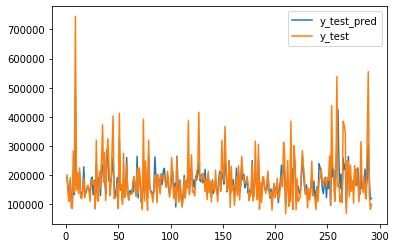

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(1,len(y_test_mean)+1), y_test_mean, 
         label='y_test_pred')
plt.plot(np.arange(1, len(y_test)+1), y_test,label='y_test')
plt.legend()

In [20]:
train_mean_mse = MSE(y_train, y_train_mean)
test_mean_mse = MSE(y_test, y_test_mean)

In [21]:
print('トレーニングデータのMSE: {}'.format(train_mean_mse))
print('テストデータのMSE: {}'.format(test_mean_mse))

トレーニングデータのMSE: 1395983959.2136357
テストデータのMSE: 2836351287.500882


In [22]:
#ロジスティック回帰の平均二乗誤差との比較
train_lr_mse = MSE(y_train, y_train_pred_lr)
test_lr_mse = MSE(y_test, y_test_pred_lr)
print('線形回帰のトレMSE: {}'.format(train_lr_mse))
print('線形回帰のテストMSE: {}'.format(test_lr_mse))

線形回帰のトレMSE: 1996735698.7802489
線形回帰のテストMSE: 2942066921.6721087


In [23]:
print('トレーニングデータは{}倍の誤差'.format(
    train_mean_mse / train_lr_mse))
print('テストデータは{}倍の誤差'.format(
    test_mean_mse / test_lr_mse))

トレーニングデータは0.6991330700735225倍の誤差
テストデータは0.9640675630481091倍の誤差


In [24]:
#ハイパーパラメータのブレンディング
tree_param_1 = DecisionTreeRegressor(max_depth = 5)
tree_param_2 = DecisionTreeRegressor(max_depth = 10)
tree_param_3 = DecisionTreeRegressor(max_depth = 15)


In [25]:
tree_param_1 = tree_param_1.fit(X_train, y_train)
tree_param_2 = tree_param_2.fit(X_train, y_train)
tree_param_3 = tree_param_3.fit(X_train, y_train)

In [26]:
y_train_pred_para1 = tree_param_1.predict(X_train)
print(y_train_pred_para1)
y_train_pred_para2 = tree_param_2.predict(X_train)
y_train_pred_para3 = tree_param_3.predict(X_train)
y_train_mean_para_pred = (y_train_pred_para1 + y_train_pred_para2 + y_train_pred_para3) / 3

[267649.20967742 120437.02884615 106882.31       ... 172781.85806452
 208640.86538462 251867.97590361]


In [27]:
para_mean_mse = MSE(y_train, y_train_mean_para_pred)
print(para_mean_mse)#線形回帰のmseと比較して1桁少ない

333851950.0202931


In [28]:
lr_standard= LinearRegression()
lr_logarithm = LinearRegression()

In [29]:
#入力データの前処理によるブレンディング
X_train_Logarithm = np.log(X_train)
lr_standard = lr_standard.fit(X_train_standard, y_train)
lr_logarithm = lr_logarithm.fit(X_train_Logarithm, y_train)

In [30]:
standard_pred = lr_standard.predict(X_train_standard)
logarithm_pred = lr_logarithm.predict(X_train_Logarithm)

In [31]:
print(MSE(y_train, standard_pred))

1996735698.7802467


In [32]:
print(logarithm_pred)

[251121.29705818 102864.93775686  73077.21536354 ... 228799.5419444
 223835.42508092 243315.24000022]


In [33]:
preprocessing_blend = (standard_pred + logarithm_pred) / 2
print('mse: ', MSE(y_train, preprocessing_blend))

mse:  2100397575.2562335


良い結果でず

In [34]:
print(MSE(y_train, logarithm_pred))

2277396833.5953913


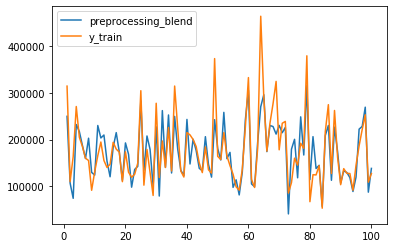

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(1,len(preprocessing_blend[:100])+1), preprocessing_blend[:100], 
         label='preprocessing_blend')
plt.plot(np.arange(1, len(y_train[:100])+1), y_train[:100],label='y_train')
plt.legend()

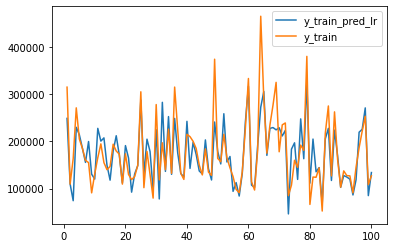

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(1,len(simple_lr_pred[:100])+1), simple_lr_pred[:100], 
         label='y_train_pred_lr')
plt.plot(np.arange(1, len(y_train[:100])+1), y_train[:100],label='y_train')
plt.legend()

In [37]:
#別のモデルのブレンディング
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor

In [62]:
lgb = LGBMRegressor()
lgb = lgb.fit(X_train, y_train)
ada = AdaBoostRegressor()
ada = ada.fit(X_train, y_train)
lgb_pred = lgb.predict(X_train)
ada_pred = ada.predict(X_train)
another_models_pred = (lgb_pred + ada_pred) / 2
print('MSE: ', MSE(another_models_pred, y_train))

MSE:  1147267557.5681357


# 問題2 バギングのスクラッチ実装

In [52]:
class Bagging:
    
    def __init__(self, est_list):

        self.est_list = est_list
#         self.bagi_num = bagi_num
        self.learned_est_list = []
        self.pred_list = []
      
    
    def fit(self, X, y, train_size):
    
        for est in self.est_list:

            #ダイバーのやり方だと非復元抽出になってしまっている
            #復元抽出にするためには、同じindexも取ってくるように
            #しなければいけない
#             X_train_bagi, X_test_bagi, y_train_bagi, y_test_bagi = \
#             train_test_split(X,y, random_state=0,shuffle=True,
#                              train_size = train_size)
            
            X_train_idx = np.random.choice(X.shape[0],
                                           int(np.round(X.shape[0] * train_size)))
            print(X_train_idx.shape,'shpae')
            X_train_bagi = X[X_train_idx,:]
            y_train_bagi = y[X_train_idx]
            
            #testデータは捨てる
            #print('estの正体：',est)
            est = est.fit(X_train_bagi, y_train_bagi)
            self.learned_est_list.append(est)
    
    def predict(self,X):
        for learned_est in self.learned_est_list:
            y_pred = learned_est.predict(X)
            self.pred_list.append(y_pred)
        y_pred_bagging = np.mean(self.pred_list,axis=0)
        return y_pred_bagging

In [61]:
tree_list = []
for i in range(20):
    tree = DecisionTreeRegressor()
    tree_list.append(tree)
bagi = Bagging(tree_list)
bagi.fit(np.array(X_train_standard), np.array(y_train),0.2)
bagi_pred = bagi.predict(X_test_standard)
#print(bagi_pred)

bagi_test_mse = MSE(np.array(y_test), bagi_pred)
print('決定木によるテストデータのバギングのMSE: {}'.format(
bagi_test_mse))

(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
決定木によるテストデータのバギングのMSE: 2115184212.5703475


# 問題3 スタッキングのスクラッチ実装

In [91]:
# from sklearn.linear_model import LinearRegression
# lr_sta = LinearRegression()
# svr_sta = SVR()


# k_num = 5
# model_list1 = [lr_sta, tree_sta]
# model_list2 = [tree_sta, lr_sta]
# model_list_last = [lr_sta]
# stage1 = Stage(k_num, model_list1)
# stage2 = Stage(k_num, model_list2)
# stage_last = Stage(k_num, model_list_last)
# X_array = np.array(X)
# y_array = np.array(y)
# y_preds = stage.forward(X_array,y_array)
# y_preds = stage2.forward(y_preds, y_array)
# y_preds = stage_last.forward(y_preds, y_array)
# print(y_preds)




NameError: name 'tree_sta' is not defined

In [66]:
# test_stage = Stage(5, model_list1)

# test_stage.forward(X_train_standard, y_train_array)

NameError: name 'model_list1' is not defined

In [63]:
# test_stage.predict(X_test_standard[:10])

NameError: name 'test_stage' is not defined

In [92]:
# print(X_train_standard.shape)
# print(y_train_array[:500])
# print(X_train_array[:500])

# y_train_array = np.array(y_train)
# y_test_array = np.array(y_test)
# lr_test = LogisticRegression()
# lr_test = lr_test.fit(X_train_standard,y_train_array)
# y_pred = lr_test.predict(X_test_standard)
# print('y_pred',y_pred)
# print('y_test', y_test_array)

In [93]:
# test_stage.learned_models[0,0].predict(X_test_standard)

最初に指定されたインデックス-最後のインデックスの一歩手前

In [78]:
from sklearn.model_selection import KFold

class Stage:
    
    def __init__(self, k_num, model_list):
        self.k_num = k_num
        self.model_list = model_list
        self.learned_models = np.empty((len(self.model_list),
                                        self.k_num)).astype(dtype=object)
        self.mse_array = None
#         self.dim_list = dim_list        
    def forward(self,X,y):
            
            
#             print(str(X.shape[1]) + '個の特徴量で学習を開始します。')
            y_preds = np.zeros((X.shape[0], len(self.model_list)))
#             d_count = 0
            
        
            for idx, model in enumerate(self.model_list):
                
                y_preds_by_dim = np.zeros(X.shape[0])
                start_sample_idx = 0
                
#                 x_dim = X[:,dim]
                
#                 if x_dim.ndim == 1:
#                     x_dim = x_dim.reshape(-1,1)
                
                #kfold_crossvalidation_start
                k_count = 0
                kf  = KFold(n_splits = self.k_num)
                
                for train_idx, test_idx in kf.split(X, y):
                    
                    #学習
#                     print('サンプル数', X.shape[0])
#                     print('index数', len(train_idx))
                    #print('k_sample', train_idx)
                    model = model.fit(X[train_idx,:], y[train_idx])
                    
#                     print('k_count, d_count')
                    #print(k_count, dim)
#                     print(type(model))
                    #学習済みモデルの格納
                    self.learned_models[idx, k_count] = model
                    k_count += 1
                    
                     #予測
                    y_pred = model.predict(X[test_idx])
                    
                    #予測値の格納
                    sample_num = len(test_idx)
#                     print('y_preds_by_dim', len(y_preds_by_dim))
#                     print('sample_num', sample_num)
#                     print('start_sample_idx', start_sample_idx)
                    last_sample_idx = sample_num + start_sample_idx
#                     print('last_sample_idx', last_sample_idx)
                    y_preds_by_dim[start_sample_idx : last_sample_idx] =\
                    y_pred
                    start_sample_idx = last_sample_idx 
                    
                    
#                 print('最後の値が格納されているかチェック', y_preds_by_dim)
                y_preds[:,idx] = y_preds_by_dim
            
            return y_preds
        
    def predict(self, X):
#         print('使用するモデルの形を表示：',self.learned_models.shape)
        len_models = len(self.model_list)
#         print('モデルの長さ：', len_models)
        test_preds_mean_array = np.zeros((X.shape[0], len_models))
        
        for i in range(len_models):
            test_preds = np.zeros((X.shape[0], self.k_num))
            for j in range(self.k_num):
#                 print(str(X.shape[1]) + '個の特徴量で予測を行います。')
                test_pred = self.learned_models[i, j].predict(X)
#                 print('test_pred', test_pred[:3])
                test_preds[:, j] = test_pred
#             print('test_preds in stage:', test_preds[:3,:])
            test_preds_mean = np.mean(test_preds, axis=1)
#             print('test_preds_mean: ', test_preds_mean)
            test_preds_mean_array[:,i] = test_preds_mean
#         print('test_preds_mean_array', test_preds_mean_array[:3,:])
        return test_preds_mean_array
    
    def mse(self, X, y):
        mse_scores = np.zeros_like(self.learned_models)
        for i in range(self.learned_models.shape[0]):
            for j in range(self.learned_models.shape[1]):
                model = self.learned_models[i,j]
                y_pred = model.predict(X)
                mse_score = MSE(y,y_pred)
                mse_scores[i,j] = mse_score
        return mse_scores
        
        
                
                    
        

In [74]:
class Stacking:
    def __init__(self, model_lists, k_num):
        self.model_lists = model_lists
        self.k_num = k_num
        self.test_preds_mean_list = []
        self.learned_model_lists = []
        self.stages = []
        self.mse_scores_list = []
        for  model_list in model_lists:
            stage = Stage(self.k_num, model_list)
            self.stages.append(stage)
            
    
    def fit(self, X,y):
        y_preds = X
        count = 1
        for stage in self.stages:
#             print(type(y_preds),'y_predsのタイプ')
#             print()
#             print('==========' + str(count) + '回目の学習開始=======')
#             print()
            y_preds =stage.forward(y_preds,y) 
#             print()
#             print('==========' + str(count) + '回目の学習終了=======')
#             print()
#             print(y_preds.shape,'y_preds_shape yの形')
            self.learned_model_lists.append(stage.learned_models)
            count += 1
    
    def _predict(self, X):
        test_pred = X
        count = 1
        for stage in self.stages[:-1]:
            
#             print(test_pred.shape,'test_pred_shape')
#             print()
#             print('==========' + str(count) + '回目の予測開始=======')
#             print()
            test_pred =stage.predict(test_pred)
#             print()
#             print('==========' + str(count) + '回目の予測終了=======')
#             print()
#             print(test_pred.shape,'test_pred.shape テストの形')
            count += 1
        return test_pred
    
    def predict(self,X):
        test_pred = self._predict(X)
        last_model = self.learned_model_lists[-1][0][0]
#         print()
#         print('==========最後の予測開始=======')
#         print()
        test_pred = last_model.predict(test_pred)
#         print()
#         print('==========最後の予測終了=======')
#         print()
#         print(test_pred.shape,'test_pred.shape テストの形')
        return test_pred
    
    def mse(self, X,y):
        for stage in self.stages:
            mse_scores =  stage.mse(X,y)
            self.mse_scores_list.append(mse_scores)
            return self.mse_scores_list
        
            
            
#         for model in self.learned_model_lists[:-1]:
#             test_preds = np.zeros((X.shape[0], k_num))
#             for idx, k_sep_model in enumerate(model):
#                 test_pred = k_sep_model.predict(X)
#                 test_preds[:,idx] = test_pred
#             test_preds_mean = np.mean(test_preds,axis=1)
#             self.test_preds_mean_list.append(test_preds_mean)
        
            
                
            
        
        
        
        
        
            

In [70]:
def TreeSearch(tree_params, X_train_standard, X_test_standard,
              y_train_array, y_test_array):
    
    best_mse = 10**12
    best_params = np.zeros(3)
    best_model = None
    
    for i in tree_params[0]:
        for j in tree_params[1]:
            for k in tree_params[2]:
                rfr_sta1 = RandomForestRegressor()
                rfr_sta2 = RandomForestRegressor()
                lr_sta1 = LinearRegression()
                lr_sta2 = LinearRegression()
                lr_sta3 = LinearRegression()
                svr_sta1 = SVR()
                svr_sta2 = SVR()
                tree_sta_1 = DecisionTreeRegressor(max_depth=i)
                tree_sta_2 = DecisionTreeRegressor(max_depth=j)
                tree_sta_3 = DecisionTreeRegressor(max_depth=k)
                model_list1 = [tree_sta_2, tree_sta_1,svr_sta1]
                model_list2 = [rfr_sta2, lr_sta1,svr_sta2]
                model_list3 = [lr_sta2,tree_sta_3]
                model_list_last = [lr_sta3]



                model_lists = [model_list1, model_list2, model_list3,model_list_last]
                stacking = Stacking(model_lists, 10)
                stacking.fit(X_train_standard, y_train_array)
                y_pred = stacking.predict(X_test_standard)
                mse = MSE(y_pred, y_test_array)
                if mse < best_mse:
                    best_mse = mse
                    best_params = np.array([i, j, k])
                    best_model = stacking
                    
    
    return best_mse, best_params,best_model
                    
                
                
                
                
                
    
    

In [79]:
from sklearn.ensemble import RandomForestRegressor
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

tree_params1 = [4,5,6]
tree_params2 = [29,30,31]
tree_params3 = [12,13,14]
tree_params = [tree_params1,tree_params2,tree_params3]

best_mse, best_params,best_model = TreeSearch(tree_params, X_train_standard, X_test_standard,
              y_train_array, y_test_array)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to acc

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to acc

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to acc

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# スタッキングを用いたベストスコア

In [80]:
print(best_mse)

1844205497.4316928


In [81]:
best_params

array([ 5, 29, 14])

In [82]:
from sklearn.ensemble import RandomForestRegressor
rfr_sta1 = RandomForestRegressor()
rfr_sta2 = RandomForestRegressor()
lr_sta1 = LinearRegression()
lr_sta2 = LinearRegression()
lr_sta3 = LinearRegression()
svr_sta1 = SVR()
svr_sta2 = SVR()


tree_sta_1 = DecisionTreeRegressor(max_depth=5)
tree_sta_2 = DecisionTreeRegressor(max_depth=29)
tree_sta_3 = DecisionTreeRegressor(max_depth=12)
model_list1 = [tree_sta_2, tree_sta_1,svr_sta1]
model_list2 = [rfr_sta2, lr_sta1,svr_sta2]
model_list3 = [lr_sta2,tree_sta_3]
model_list_last = [lr_sta3]



model_lists = [model_list1, model_list2, model_list3,model_list_last]
stacking = Stacking(model_lists, 10)

In [83]:
print(type(X_train_standard))
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
stacking.fit(X_train_standard, y_train_array)


<class 'numpy.ndarray'>


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

In [84]:
y_pred = stacking.predict(X_test_standard)

In [85]:
scores = stacking.mse(X_test_standard, y_test_array)
print(scores)

[array([[3109668393.349315, 3109668393.349315, 3109668393.349315,
        3109668393.349315, 3109668393.349315, 3109668393.349315,
        3109668393.349315, 3109668393.349315, 3109668393.349315,
        3109668393.349315],
       [1573153868.727294, 1573153868.727294, 1573153868.727294,
        1573153868.727294, 1573153868.727294, 1573153868.727294,
        1573153868.727294, 1573153868.727294, 1573153868.727294,
        1573153868.727294],
       [7228751267.748268, 7228751267.748268, 7228751267.748268,
        7228751267.748268, 7228751267.748268, 7228751267.748268,
        7228751267.748268, 7228751267.748268, 7228751267.748268,
        7228751267.748268]], dtype=object)]


In [86]:
print('スタッキングMSEスコア:', MSE(y_pred, y_test_array))

スタッキングMSEスコア: 1896654468.5261319


In [87]:
#y_pred_50 = y_pred
#y_test_50 = y_test_array

y_pred_50 = y_pred[:20]
y_test_50 = y_test_array[:20]

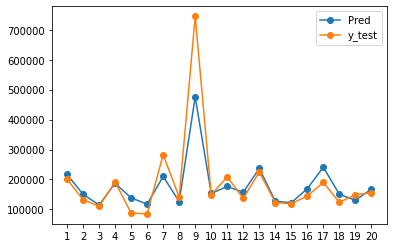

In [88]:
plt.plot(np.arange(1,len(y_pred_50)+1), y_pred_50,label='Pred',
        marker='o')
plt.plot(np.arange(1,len(y_test_50) + 1), y_test_50, 
         label='y_test',marker='o')
plt.xticks(np.arange(1,len(y_pred_50)+1))
plt.legend()



In [90]:
one_stage = Stage(5,model_list1)
one_stage.forward(X_train_standard,y_train_array)
one_stage.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

array([[184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        

In [89]:
print(stacking.learned_model_lists[0])

[[DecisionTreeRegressor(criterion='mse', max_depth=29, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
  DecisionTreeRegressor(criterion='mse', max_depth=29, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
  DecisionTreeRegressor(criterion='mse', max_depth=29, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
  

In [669]:
stacking.learned_model_lists[-1][0][0]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [742]:
choice = np.random.choice(np.arange(12),5)
choice

array([1, 2, 9, 4, 4])

In [786]:
class AdaBoost:
    def __init__(self,est_list, size):
        self.est_list = est_list
        self.size = size
        self.learned_models = []
        
    def fit(self,X,y):
        
        self.first_fit(X,y)
        self.fit_inclue_false_pred(X,y)
        self.not_match_data_fit(X,y)
        pred_array = np.concatnate([pred1,pred2,pred3],axis=0)
        pred = np.mean(pred_array,axis=0)
        
        
        
    def first_fit(self,X,y):
        
        X_train, y_train, X_test,y_test = \
        train_test_split(X,y,test_size=self.size)
        d1_train = X
        d1_test = y    
        
        est = self.est_list[0].fit(d1_train, d1_test)
        self.learned_models.append(est)
        est_pred = est.predict(X_test)
        
        
        
        
        
    def predict(self,X):
        
        
        pred1 = self.first_fit(X,y)
        pred2 = self.fit_inclue_false_pred(X,y)
        pred3 = self.not_match_data_fit(X,y)
        pred_array = np.concatnate([pred1,pred2,pred3],axis=0)
        pred = np.mean(pred_array,axis=0)
        return pred
        
        
    

SyntaxError: invalid syntax (<ipython-input-786-4c500b15c81f>, line 6)

In [ ]:
X